# Questão 1

Considere a integral

$
I = \int_0^π e^{sen(x)} dx
$,

e uma tolerância  = 0.02.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

## (a)
Calcule a integral acima usando a regra dos trapézios repetida com erro menor que a tolerância. Quantos sub-intervalos foram usados? Justifique sua resposta.

Podemos, a partir da tolerância, determinar quantos sub-intervalos devem ser utilizados. Para satisfazer a tolerância, o majorante do erro deve ser menor que ela.

$\left|I(f) - T_n(f)\right| < ϵ = 0.02 \iff \frac{b - a}{12} h^2 M_2 < 0.02$

No caso, $a=0$ e $b=\pi$. Ainda, $M_2 = \max_{a \le \xi \le b}{|f''(\xi)|}$.

De $f(x) = e^{sen(x)}$, $f'(x) = cos(x) \times e^{sen(x)}$ e $f''(x) = \left( cos^2(x) - sen(x) \right) \times e^{sen(x)}$.

1.5707963267948968 -2.718281828459045


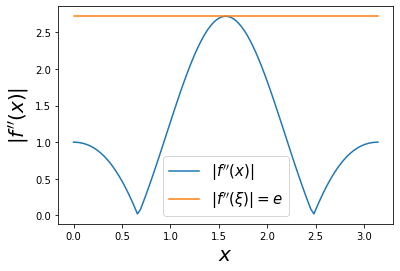

In [2]:
a,b = 0,np.pi

t = np.linspace(a, b, 101)
d2f_dx2 = (np.square(np.cos(t)) - np.sin(t)) * np.exp(np.sin(t))
valor_maximo = max(np.abs(d2f_dx2))
for i in range(len(t)):
    if (np.abs(d2f_dx2[i]) == valor_maximo):
        print(t[i], d2f_dx2[i])

font = {"size":20}
plt.xlabel("$x$", fontdict=font)
plt.ylabel("$|f''(x)|$", fontdict=font)
plt.plot(t, np.abs(d2f_dx2), label="$|f''(x)|$")
plt.plot([a,b], [np.exp(1), np.exp(1)], label="$|f''(\\xi)| = e$")
plt.legend(prop={"size":15})
plt.show()

Pelo gráfico do módulo e pela inspeção da segunda derivada, identifiquei que $\max_{a \le \xi \le b}{|f''(\xi)|}$ ocorre para $\xi = 1.5707963267948968 \approx \pi/2$.

Assim, $f''(\pi/2) = \left( cos^2(\pi/2) - sen(\pi/2) \right) \times e^{sen(\pi/2)} = (0 - 1) \times e^1 = -e$.

Logo, $M_2 = e$.


Dessa forma, $\frac{b - a}{12} h^2 M_2 < 0.02 \iff \frac{\pi e}{12} h^2 < 0.02 \iff h < \sqrt{\frac{0.24}{\pi e}}$.

Portanto, de $h = \frac{b - a}{n}$, $n = \frac{\pi}{h} > \pi \sqrt{\frac{\pi e}{0.24}} = \sqrt{\frac{\pi^3 e}{0.24}} \approx 18.74$.

Destarte, como $n > 18.74$, basta $n = 19$.

In [3]:
f = lambda x: np.exp(np.sin(x))

def RegraTrapeziosRepetida(f, a, b, n):
    h = (b - a) / n
    x = np.array([a + h * k for k in range(n+1)])

    integral = 0
    for i in range(n+1):
        if (0 < i < n):
            integral += 2*f(x[i])
        else:
            integral += f(x[i])
    integral *= h/2

    return integral

In [4]:
integral = RegraTrapeziosRepetida(f, 0, np.pi, 19)
integral

6.204201442511748

Após implementar a Regra de Trapezios Repetida, obtive como resultado $I = 6.204201442511748$.

In [5]:
resultado, erro = quad(f, a, b)
resultado, erro

(6.20875803571111, 4.051169407494022e-10)

In [6]:
np.abs(integral - resultado) < 0.02 + erro

True

Comparando com o resultado de uma função implementada pelo módulo `scipy.integrate`, confirmei que o cálculo encontra-se na margem de tolerância.

## (b)
Calcule a integral acima usando a regra 1/3 de Simpson repetida com erro menor que tolerância. Quantos sub-intervalos foram usados? Justifique sua resposta.

Novamente, podemos, a partir da tolerância, determinar quantos sub-intervalos devem ser utilizados. Para satisfazer a tolerância, o majorante do erro deve ser menor que ela.

$\left|I(f) - S_n(f)\right| < ϵ = 0.02 \iff \frac{b - a}{180} h^4 M_4 < 0.02$

No caso, $a=0$ e $b=\pi$. Ainda, $M_4 = \max_{a \le \xi \le b}{|f^{(iv)}(\xi)|}$.

De $f''(x) = \left( cos^2(x) - sen(x) \right) \times e^{sen(x)}$, $f'''(x) = \left( cos^3(x) - 3 sen(x) cos(x) - cos(x) \right) \times e^{sen(x)}$ e $f^{(iv)}(x) = \left( cos^4(x) - 6 sen(x) cos^2(x) - 4cos^2(x) + 3sin^2(x) + sin(x) \right) \times e^{sen(x)}$.

1.5707963267948968 10.87312731383618


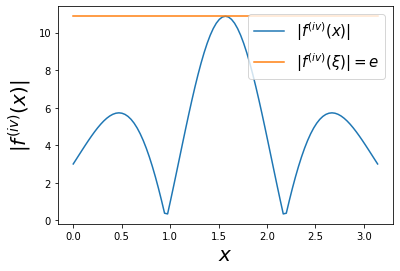

In [7]:
d4f_dx4 = (np.power(np.cos(t), 4) - 6*np.sin(t)*np.square(np.cos(t)) - 4*np.square(np.cos(t)) + 3*np.square(np.sin(t)) + np.sin(t)) * np.exp(np.sin(t))
valor_maximo = max(np.abs(d4f_dx4))
for i in range(len(t)):
    if (np.abs(d4f_dx4[i]) == valor_maximo):
        print(t[i], d4f_dx4[i])

font = {"size":20}
plt.xlabel("$x$", fontdict=font)
plt.ylabel("$|f^{(iv)}(x)|$", fontdict=font)
plt.plot(t, np.abs(d4f_dx4), label="$|f^{(iv)}(x)|$")
plt.plot([a,b], [10.87312731383618, 10.87312731383618], label="$|f^{(iv)}(\\xi)| = e$")
plt.legend(prop={"size":15})
plt.show()

A partir da análise, notei que $M_4 = 10.87$ para $\xi = 1.57$.

Logo, de $\frac{b - a}{180} h^4 M_4 < 0.02$ e $M_4 = 10.87$, obtemos $h < \sqrt[4]{\frac{3.6}{M_4 \pi}}$.

Portanto, de $h = \frac{b - a}{n}$, $n = \frac{\pi}{h} > \pi \sqrt[4]{\frac{M_4 \pi}{3.6}} \approx 5.513791429310815$.

Destarte, como $n>5.513791429310815$, basta $n=6$.

In [8]:
np.pi * np.power(10.87312731383618 * np.pi / 3.6, 0.25)

5.513791429310815

In [9]:
def RegraSimpsonRepetida(f, a, b, n):
    h = (b - a) / n
    x = np.array([a + h * k for k in range(n+1)])

    integral = 0
    for i in range(n+1):
        if (0 < i < n):
            if (i%2 == 1):
                integral += 4 * f(x[i])
            else:
                integral += 2 * f(x[i])
        else:
            integral += f(x[i])
    integral *= h/3

    return integral

In [10]:
integral = RegraSimpsonRepetida(f, a, b, 6)
integral

6.208601834670837

In [11]:
resultado, erro = quad(f, a, b)
resultado, erro

(6.20875803571111, 4.051169407494022e-10)

In [12]:
np.abs(integral - resultado) < 0.02 + erro

True

Comparando com o resultado de uma função implementada pelo módulo `scipy.integrate`, confirmei que o cálculo encontra-se na margem de tolerância.

# Questão 2

A fórmula de Newton-Cotes fechada deve fornecer uma boa aproximação para a integral

$
I = \int_{-1}^{+1} \frac{dx}{1 + 25x^2}
$,

para $n$ grande (por exemplo, $n ≥ 10$)? Justifique sua resposta.

Vou considerar o caso da Regra 1/3 de Simpson Repetida.

De $f(x) = \frac{1}{1 + 25x^2}$, sabemos:

$$
\begin{cases}
f'(x) = - \frac{50x}{\left(1 + 25x^2\right)^2} \\
f''(x) = \frac{5000x^2}{(1 + 25x^2)^3} - \frac{50}{\left(1 + 25x^2\right)^2} \\
f'''(x) = \frac{15 000x}{(1 + 25x^2)^3} - \frac{750 000 x^3}{\left(1 + 25x^2\right)^4} \\
f^{(iv)}(x) = -\frac{4 500 000 x^2}{(1 + 25x^2)^4} + \frac{15 000}{(1 + 25x^2)^3} + \frac{150 000 000 x^4}{\left(1 + 25x^2\right)^5}
\end{cases}
$$

0.0 15000.0


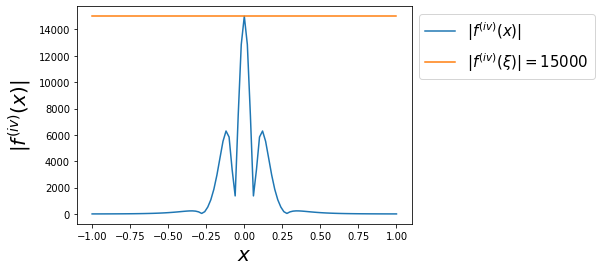

In [13]:
a,b = -1,1

t = np.linspace(a, b, 101)
t2 = np.square(t)
den = 1 + 25 * t2
d4f_dx4 = - 4_500_000 * t2 / np.power(den, 4) + 15_000 / np.power(den, 3) + 150_000_000 * np.square(t2) / np.power(den, 5)
valor_maximo = max(np.abs(d4f_dx4))
for i in range(len(t)):
    if (np.abs(d4f_dx4[i]) == valor_maximo):
        print(t[i], d4f_dx4[i])

font = {"size":20}
plt.xlabel("$x$", fontdict=font)
plt.ylabel("$|f^{(iv)}(x)|$", fontdict=font)
plt.plot(t, np.abs(d4f_dx4), label="$|f^{(iv)}(x)|$")
plt.plot([a,b], [15_000] * 2, label="$|f^{(iv)}(\\xi)| = 15000$")
plt.legend(prop={"size":15},bbox_to_anchor=(1,0.5,0.5,0.5))
plt.show()

Analisando o gráfico da função, podemos concluir o seguinte: 

$M_4 = \max_{a \le \xi \le b}{|f^{(iv)}(\xi)|} = 15000$ para $\xi = 0$

Dessa forma, temos:      

$\left|I(f) - S_n(f)\right| < \frac{b-a}{180} h^4 M_4 = \frac{b-a}{180} \left(\frac{b-a}{n}\right)^4 M_4 = \frac{\left(b-a\right)^5}{180n^4} M_4 < \epsilon$.

Fazendo a resolução $ϵ = 0.02$, como na questão anterior, obtemos:    

$n > \sqrt[4]{\frac{\left(b-a\right)^5}{180 \epsilon} M_4} = \sqrt[4]{\frac{15000 \times 2^5}{180 \times 0.2}} \approx 19.11 \Rightarrow n > 19.11$ 

Logo, com $n=20$, é possível fornecer uma boa aproximação para a integral $I$ por meio da Fórmula de Newton-Cotes Fechada, e utilizando a Regra de 1/3 de Simpson Repetida.

Agora, vamos calcular a integral dessa forma.

In [14]:
f = lambda x: 1/(1 + 25 * np.square(x))

In [15]:
integral = RegraSimpsonRepetida(f, a, b, 20)
integral

0.5485816035037206

In [16]:
resultado, erro = quad(f, a, b)
resultado, erro

(0.5493603067780066, 2.8668279350011863e-09)

In [17]:
np.abs(integral - resultado) < 0.02 + erro

True

De fato, a integral foi calculada. E, ao comparar seu valor com a obtida por meio de `scipy.integrate.quad`, atestei que o erro esteve dentro da resolução ocorrida.

Portanto, concluímos que a fórmula de Newton-Cotes fechada pode fornecer uma boa aproximação para $I$ com $n$ grande.